Continuación del Notebook _EDA_HY.ipynb_ con la EDA de las variables IDEA.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
# import seaborn as sns # En los boxplot de seaborn no se aprecian los outliers

df = pd.read_csv('df_HY_limpias.csv', sep = '|', encoding='utf-8')

In [2]:
def PlotCantNaN(df, var):
    fig = plt.figure(figsize=(15,10))
    
    plt.subplot(221)
    plt.title(var, fontsize=12)
    
    # NaNs vs no NaNs
    cant_nans = np.sum(df.isnull())
    cant_no_nans = df.shape[0] - cant_nans
    
    plt.title(var, fontsize=12)
    plt.bar([1,2],[cant_nans, cant_no_nans])
    plt.text(1, cant_nans+200, cant_nans, horizontalalignment='center', verticalalignment='center', fontdict=dict(color='black', 
                                                                                                    size = 'x-large',
                                                                                                    style = 'italic'))
    plt.text(2, cant_no_nans+200, cant_no_nans, horizontalalignment='center', verticalalignment='center', fontdict=dict(color='black', 
                                                                                                    size = 'x-large',
                                                                                                    style = 'italic'))
    plt.xticks([1,2],['Na', 'No Na'])
    plt.ylim(0,10000)
    plt.show()
    
def PlotValueCounts(v, rotation = 0):
    '''
    Función que realiza un bar plot de count de las variables indicando en el eje x cada clase
    v --> Un elemento resultado de un df[var].value_counts()
    '''
    plt.bar(range(len(v)), v.values)
    plt.xticks(range(len(v.index)),v.index, rotation=rotation)
    plt.show()

## IDEA_area, IDEA_poblacion e IDEA_densidad

Aprovechamos la relación entre estas 3 variables para estudiarlas simuntaneamente

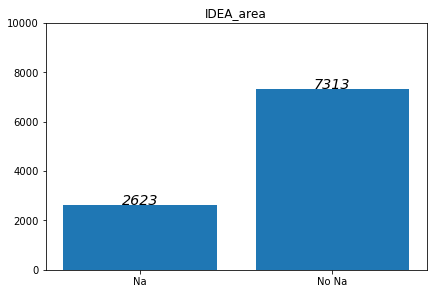

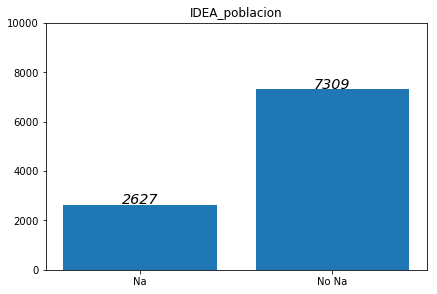

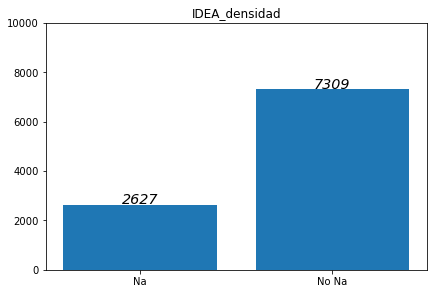

In [3]:
var1 = 'IDEA_area'
var2 = 'IDEA_poblacion'
var3 = 'IDEA_densidad'
datos1 = df[var1]
datos2 = df[var2]
datos3 = df[var3]
PlotCantNaN(datos1, var1)
PlotCantNaN(datos2, var2)
PlotCantNaN(datos3, var3)

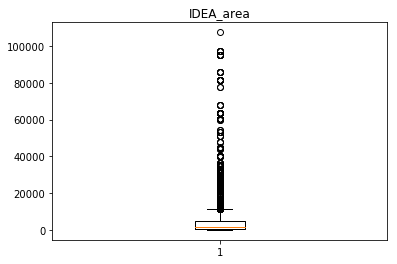

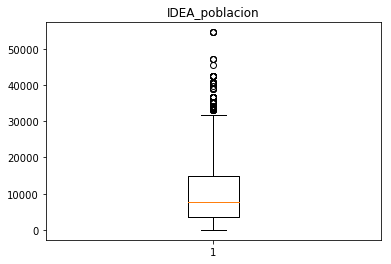

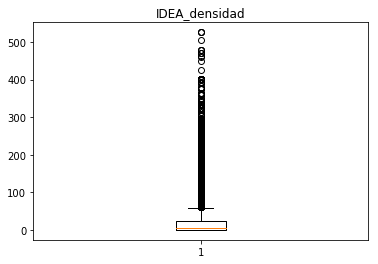

In [4]:
plt.boxplot(df[var1].dropna().values)
plt.title(var1)
plt.show()
plt.boxplot(df[var2].dropna().values)
plt.title(var2)
plt.show()
plt.boxplot(df[var3].dropna().values)
plt.title(var3)
plt.show()

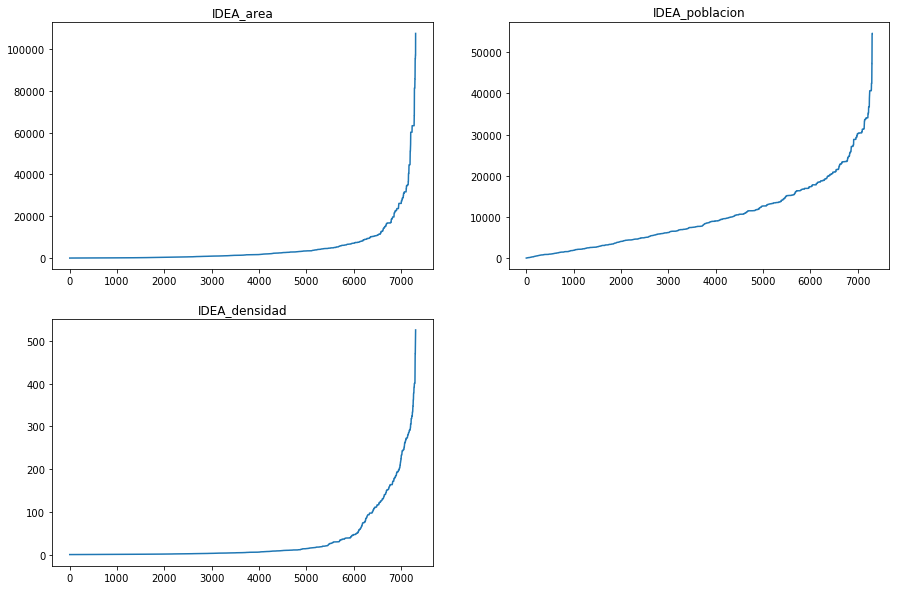

In [5]:
plt.figure(figsize=(15,10))
plt.subplot(221)
plt.plot(df[var1].sort_values().values)
plt.title(var1)
plt.subplot(222)
plt.plot(df[var2].sort_values().values)
plt.title(var2)
plt.subplot(223)
plt.plot(df[var3].sort_values().values)
plt.title(var3)
plt.show()

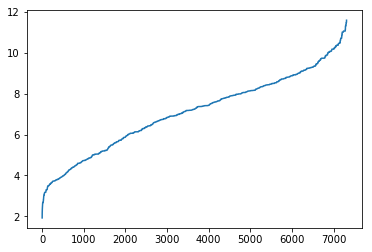

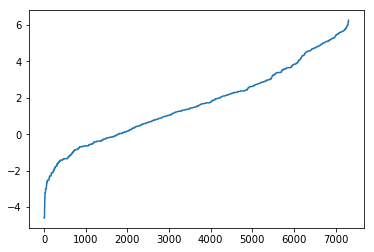

In [7]:
plt.plot(np.log(df[var1].sort_values().values))
plt.show()
plt.plot(np.log(df[var3].sort_values().values))
plt.show()

In [8]:
print('El número total de registros que tienen entre 1 y 2 Nans en nuestras variables es:',np.sum(df[[var1,var2,var3]].apply(lambda x: np.sum(x.isnull()) <3 and np.sum(x.isnull()) >0, axis = 1)))

El número total de registros que tienen entre 1 y 2 Nans en nuestras variables es: 4


#  'IDEA_pc_1960', 'IDEA_pc_1960_69', 'IDEA_pc_1970_79', 'IDEA_pc_1980_89','IDEA_pc_1990_99', 'IDEA_pc_2000_10'

Estos conjuntos de variables establecen los porcentaje de antigüedad de los edificios de una zona. Lo cual utilizaremos para estimar los valores faltantes de la variable antigüedad.

Pero de momento solo comprobaremos que son un porcentaje (La suma de todos = 1)

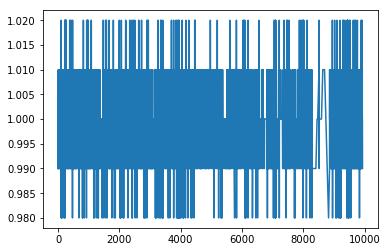

In [9]:
list_var = ['IDEA_pc_1960', 'IDEA_pc_1960_69', 'IDEA_pc_1970_79', 'IDEA_pc_1980_89','IDEA_pc_1990_99', 'IDEA_pc_2000_10']

# Nota: si hacemos la suma de Nans es 0
v = df[list_var].dropna().sum(axis = 1)
plt.plot(v)
plt.show()

Lo interesante de este conjunto de variables, es que en el análisis de correlación, las variables *IDEA\_pc\_1960* e *IDEA\_pc\_1960\_69*, tienen un coeficiente de 1, es decir, que son la misma variable. Por lo que eliminaremos *IDEA\_pc\_1960* del conjunto de variables.

In [10]:
print('La diferencia entre las medidas de ambas variables es:',np.sum(df['IDEA_pc_1960']-df['IDEA_pc_1960_69']))

La diferencia entre las medidas de ambas variables es: 0.0


Así pues, ambas variables son la misma.

# Comprobación del área

In [31]:
np.sum(df.IDEA_area - df.HY_metros_totales <= 0)

842

Investiguemos estos 841 inmuebles

In [56]:
dif = df.IDEA_area - df.HY_metros_totales
df.loc[dif <= 0, ['HY_provincia', 'HY_tipo','HY_metros_totales', 'IDEA_area','IDEA_poblacion', 'HY_precio', 'HY_cod_postal']]

,HY_provincia,HY_tipo,HY_metros_totales,IDEA_area,IDEA_poblacion,HY_precio,HY_cod_postal
16,Valencia,Casa de pueblo,154.27,148.16,828.0,63700.0,46800
23,Almería,Piso,211.00,53.44,13140.0,186000.0,4004
24,Almería,Piso,137.60,53.44,13140.0,180000.0,4004
95,Otros,Dúplex,110.81,37.92,3562.0,140000.0,7702
96,Otros,Piso,91.00,40.14,5825.0,71900.0,8242
103,Otros,Piso,82.74,64.54,5512.0,45000.0,43870
115,Otros,Piso,85.69,43.16,6266.0,52900.0,11401
123,Valencia,Piso,94.00,38.21,4408.0,91900.0,46920
124,Valencia,Piso,127.88,57.78,9693.0,130000.0,46700
131,Valencia,Piso,113.00,88.42,15722.0,62400.0,46910


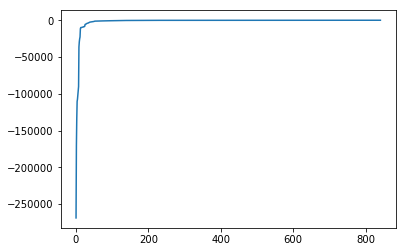

In [42]:
plt.plot(dif[dif <= 0].sort_values().values)
plt.show()

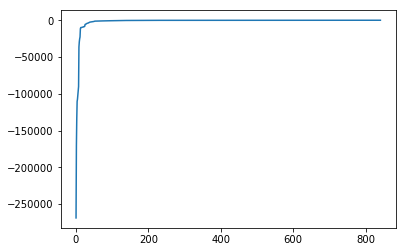

In [55]:
plt.plot(dif[dif <= 0].sort_values().values)
plt.show()

In [57]:
df.HY_metros_totales.sort_values(ascending=False)

6446    269116.00
9315    181590.00
9640    144537.00
5104    125709.00
9641    112717.00
3654    108849.00
9639    100853.00
1406     99999.00
3861     57995.00
8652     56298.00
8546     45863.00
8649     39239.00
9313     33600.00
7213     31538.00
9845     29391.00
7065     26607.68
8523     24310.00
3919     18989.00
7056     14751.98
2952     14556.00
9223     13974.00
7924     13451.00
4322     13324.00
2953     12976.00
8476     12500.00
8213     12225.00
9228     11140.00
4598     10000.00
4939      9999.00
734       9999.00
          ...    
7865         3.00
7873         3.00
7859         3.00
7858         3.00
7874         3.00
1712         2.80
1713         2.80
1265         2.80
3947         2.49
1619         2.35
8985         2.20
7871         2.05
7870         2.05
7853         2.02
7849         2.02
7867         2.02
7872         2.00
7869         2.00
7868         2.00
7866         2.00
4024         1.35
4020         1.35
581           NaN
751           NaN
2031      

In [59]:
df.HY_tipo.unique()

array(['Garaje', 'Casa de pueblo', 'Piso', 'Local', 'Chalet adosado',
       'Dúplex', 'Solar', 'Trastero', 'Chalet independiente',
       'Nave adosada', 'Oficina', 'Nave aislada', 'Almacén',
       'Aparcamiento', 'Suelo rústico no urbanizable',
       'Edificio turístico', 'Ático', 'Otro', 'Edificio comercial',
       'Chalet pareado'], dtype=object)

In [68]:
df[(df.HY_metros_totales >=20000) ]

,HY_id,HY_cod_postal,HY_provincia,HY_descripcion,HY_distribucion,HY_tipo,HY_antiguedad,HY_metros_utiles,HY_metros_totales,HY_num_banos,...,IDEA_stock_rent_residential,IDEA_demand_rent_residential,GA_page_views,GA_mean_bounce,GA_exit_rate,GA_quincena_ini,GA_quincena_ult,TARGET,PV_longitud_descripcion,PV_longitud_distribucion
1406,6035128,12006,Castellón,Parcela de tipo suelo urbano de forma irregula...,NaN,Solar,NaN,99999.00,99999.00,0,...,78.0,52.10,689,30.35,23.28,1,47,188.14,155,0
3654,6079546,46901,Valencia,Suelo rústico de uso agrario situado en el Pol...,NaN,Solar,NaN,108849.00,108849.00,0,...,120.0,50.64,541,41.19,27.86,1,47,107.68,139,0
3861,6082833,30880,Murcia,"Suelo Rústico compuesto de dos parcelas, situa...",NaN,Solar,NaN,57995.00,57995.00,0,...,6.0,50.00,804,35.78,22.78,1,46,137.95,223,0
5104,6078546,43520,Otros,NaN,NaN,Solar,NaN,125709.00,125709.00,0,...,21.0,51.96,330,19.29,21.05,4,47,79.12,0,0
6446,6033399,4630,Almería,Terrenos urbanos en el Paraje La Espesura. Tie...,Terreno de superficie registral: 269.116 m².\n...,Solar,NaN,269116.00,269116.00,0,...,54.0,51.70,426,22.22,17.42,1,47,97.46,918,310
7065,6136030,30613,Murcia,NaN,NaN,Solar,NaN,26607.68,26607.68,0,...,24.0,51.34,71,5.00,9.43,1,43,58.02,0,0
7213,6136681,12600,Castellón,NaN,NaN,Solar,NaN,31538.00,31538.00,0,...,NaN,NaN,12,12.50,50.00,33,47,15.00,0,0
8523,6819188,42005,Otros,Parcela situada en el Polígono Industrial Las ...,Terreno de superficie registral: 24.310 m².\nT...,Suelo rústico no urbanizable,NaN,24310.00,24310.00,0,...,42.0,50.90,92,16.67,22.36,13,46,58.25,251,72
8546,6827680,4820,Almería,NaN,NaN,Solar,NaN,45863.00,45863.00,0,...,NaN,NaN,339,21.08,14.41,21,47,62.27,0,0
8649,6832991,4117,Almería,NaN,NaN,Solar,NaN,39239.00,39239.00,0,...,NaN,NaN,82,23.08,22.45,33,47,106.48,0,0


In [72]:
dif2 = np.abs(df.HY_metros_utiles - df.HY_metros_totales)
df[dif2 > 500]

,HY_id,HY_cod_postal,HY_provincia,HY_descripcion,HY_distribucion,HY_tipo,HY_antiguedad,HY_metros_utiles,HY_metros_totales,HY_num_banos,...,IDEA_stock_rent_residential,IDEA_demand_rent_residential,GA_page_views,GA_mean_bounce,GA_exit_rate,GA_quincena_ini,GA_quincena_ult,TARGET,PV_longitud_descripcion,PV_longitud_distribucion
734,6031864,43202,Otros,"Piso de cuatro dormitorios, un baño y un aseo,...","La vivienda se distribuye en recibidor, cocina...",Piso,1968.0,97.45,9999.0,1,...,138.0,51.88,946,44.97,24.51,1,47,47.15,1161,143
7924,6745260,30180,Murcia,NaN,NaN,Nave adosada,NaN,751.00,13451.0,0,...,9.0,51.84,186,6.98,23.95,6,47,54.72,0,0
9845,6977350,34003,Otros,NaN,NaN,Local,NaN,260.00,29391.0,0,...,81.0,50.98,1,0.00,0.00,41,41,22.00,0,0


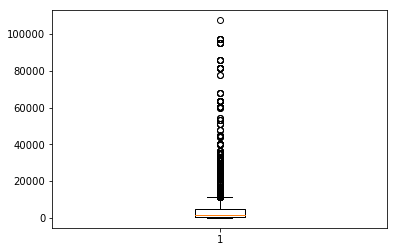

In [73]:
plt.boxplot(df.IDEA_area.dropna().values)
plt.show()

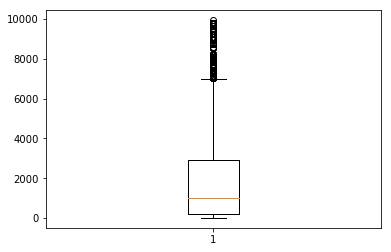

In [75]:
plt.boxplot(df.IDEA_area[df.IDEA_area<10000].dropna().values)
plt.show()

In [79]:
df.loc[df.IDEA_area <= 10,['HY_provincia', 'HY_tipo','HY_metros_totales', 'IDEA_area','IDEA_poblacion', 'HY_precio', 'HY_cod_postal']]

,HY_provincia,HY_tipo,HY_metros_totales,IDEA_area,IDEA_poblacion,HY_precio,HY_cod_postal
1950,Otros,Piso,117.00,8.64,1.0,148000.0,25537
6567,Valencia,Piso,76.92,9.50,1549.0,32700.0,46680
8984,Murcia,Piso,63.00,6.84,995.0,79000.0,30004


**Conclusión:** Las columnas de area y población son tienen valores muy atípicos. Por lo que por el momento no las tendremos en cuenta hasta que se encuentren conjuntos de datos que provean de esta información (No encontrados hasta la fecha).

**Conclusión 2:** Hay outliers en nuestro dataset con la diferencia de metros.

In [81]:
dif_metros = np.abs(df.HY_metros_utiles - df.HY_metros_totales)
df = df[dif_metros <= 500]

# 'IDEA_pc_comercio', 'IDEA_pc_industria', 'IDEA_pc_oficina', 'IDEA_pc_otros', 'IDEA_pc_residencial', 'IDEA_pc_trast_parking'

Al igual que con el conjunto de porcentajes anteriores, vamos a comprobar si son un porcentaje

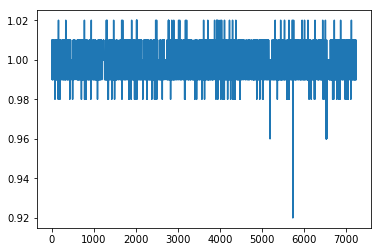

In [88]:
vars_zona = ['IDEA_pc_comercio','IDEA_pc_industria', 'IDEA_pc_oficina', 'IDEA_pc_otros','IDEA_pc_residencial', 'IDEA_pc_trast_parking']
pc_zona = df[vars_zona].dropna().sum(axis = 1)
plt.plot(pc_zona.values)
plt.show()

¿Todas las filas que tienen Nans tienen el mismo número de Nans?

In [90]:
nans_zona = df[vars_zona].isnull().sum(axis = 1)
print('Hay {} registros sin ningún Nan'.format(np.sum(nans_zona == 0)))
print('Hay {} registros con todo Nan'.format(np.sum(nans_zona == 6)))
print('Hay {} con mix'.format(nans_zona.shape[0]-np.sum(nans_zona == 0)-np.sum(nans_zona == 6)))

Hay 7234 registros sin ningún Nan
Hay 2702 registros con todo Nan
Hay 0 con mix


Por lo que tal y como propusimos con el conjunto de variables anteriores, completaremos esos registros faltantes con la media de los códigos postales o de las provincias si fuera necesario.

# IDEA_ind_tienda

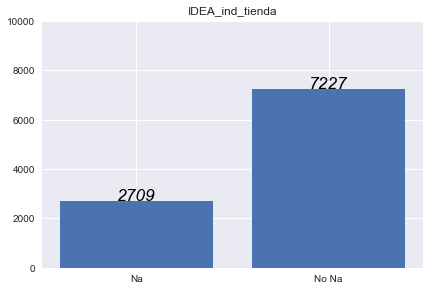

In [128]:
var = 'IDEA_ind_tienda'
PlotCantNaN(df[var], var)

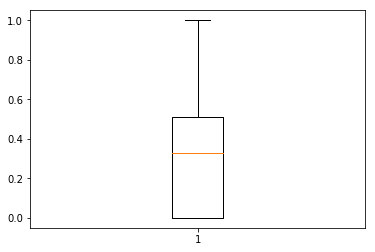

In [94]:
plt.boxplot(df[var].dropna().values)
plt.show()

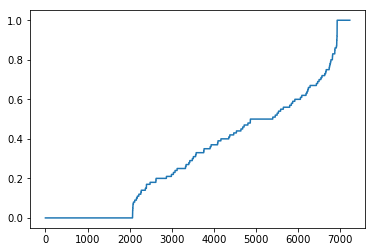

In [96]:
plt.plot(df[var].sort_values().values)
plt.show()

# IDEA_ind_turismo

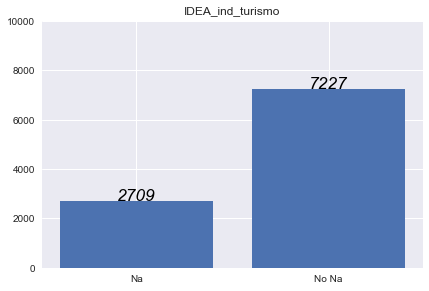

In [130]:
var = 'IDEA_ind_turismo'
PlotCantNaN(df[var], var)

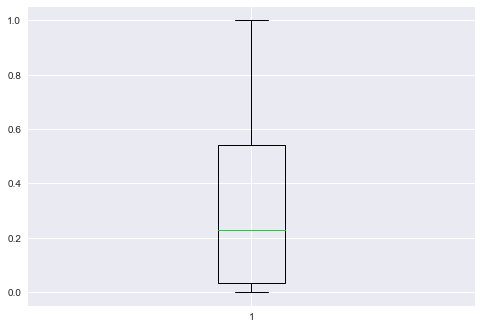

In [131]:
plt.boxplot(df[var].dropna().values)
plt.show()

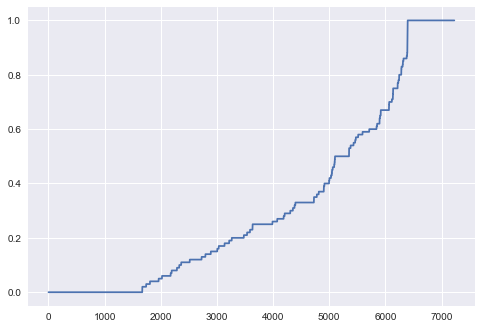

In [132]:
plt.plot(df[var].sort_values().values)
plt.show()

# IDEA_ind_alimentacion

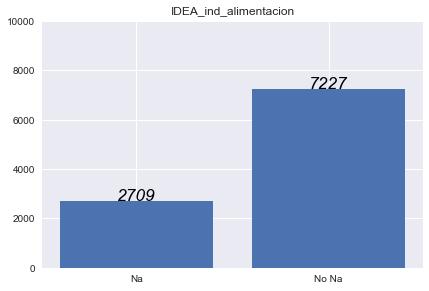

In [134]:
var = 'IDEA_ind_alimentacion'
PlotCantNaN(df[var], var)

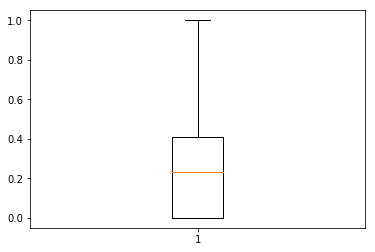

In [105]:
plt.boxplot(df[var].dropna().values)
plt.show()

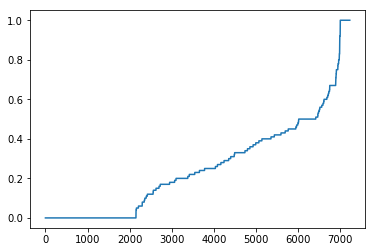

In [106]:
plt.plot(df[var].sort_values().values)
plt.show()

### Las tres anteriores juntas

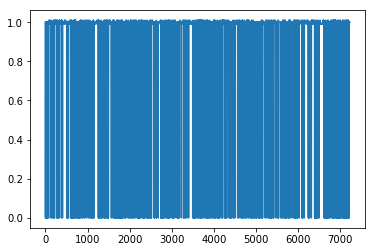

In [108]:
vars_ind = ['IDEA_ind_tienda','IDEA_ind_turismo', 'IDEA_ind_alimentacion']
suma = df[vars_ind].dropna().sum(axis = 1)
plt.plot(suma.values)
plt.show()

# IDEA_ind_riqueza

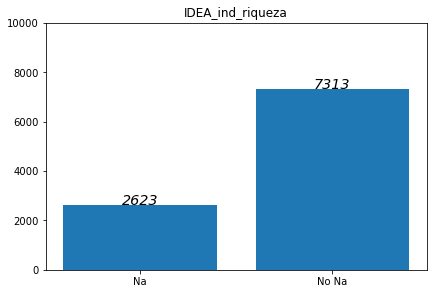

In [5]:
var = 'IDEA_ind_riqueza'
PlotCantNaN(df[var], var)

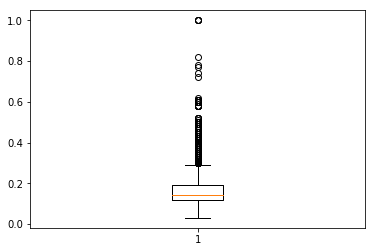

In [6]:
plt.boxplot(df[var].dropna().values)
plt.show()

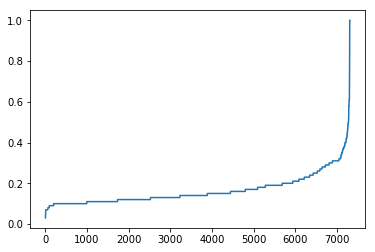

In [111]:
plt.plot(df[var].sort_values().values)
plt.show()

Tenemos un caso curioso de zonas extremadamente ricas.


# IDEA_rent_alquiler

Esta variable define la rentabilidad bruta de alquiler en la zona en tanto por ciento, es decir, sobre 100.

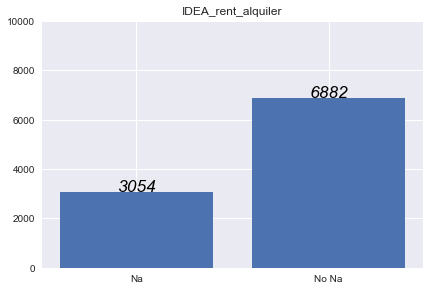

In [125]:
var = 'IDEA_rent_alquiler'
PlotCantNaN(df[var], var)

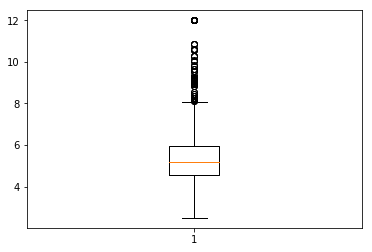

In [115]:
plt.boxplot(df[var].dropna().values)
plt.show()

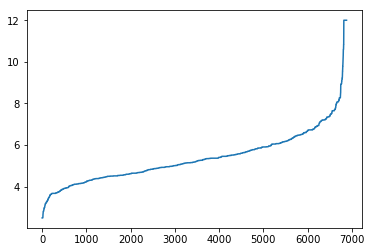

In [116]:
plt.plot(df[var].sort_values().values)
plt.show()

# IDEA_ind_elasticidad

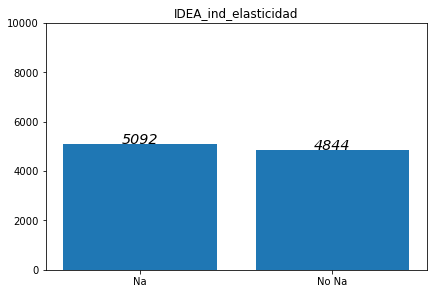

In [45]:
var = 'IDEA_ind_elasticidad'
PlotCantNaN(df[var], var)

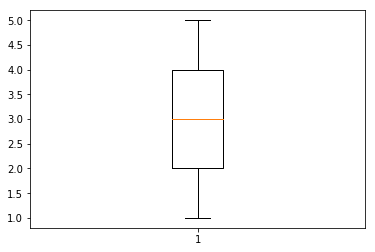

In [118]:
plt.boxplot(df[var].dropna().values)
plt.show()

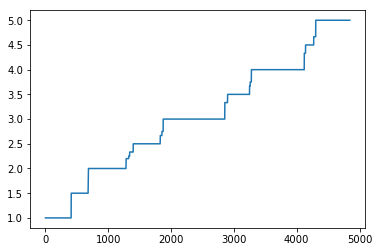

In [119]:
plt.plot(df[var].sort_values().values)
plt.show()

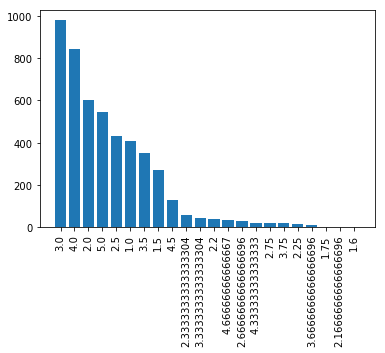

In [15]:
PlotValueCounts(df[var].value_counts(), rotation=90)

Por lo que redondeamos los valores al entero más cercano para que solo haya 5 clases.

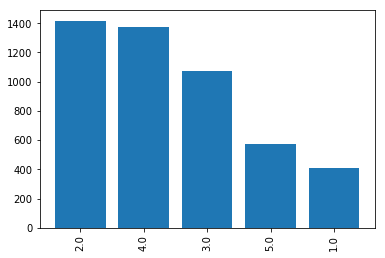

In [46]:
df['PV_ind_elasticidad'] = np.round(df[var])
PlotValueCounts(df['PV_ind_elasticidad'].value_counts(), rotation=90)

Al igual que con las variables de porcentajes, procereremos a completar los Nans con los códigos postales y las provincias.

# IDEA_ind_liquidez

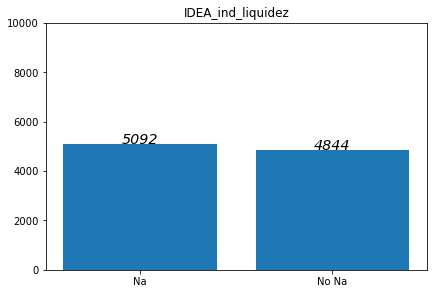

In [20]:
var = 'IDEA_ind_liquidez'
PlotCantNaN(df[var], var)

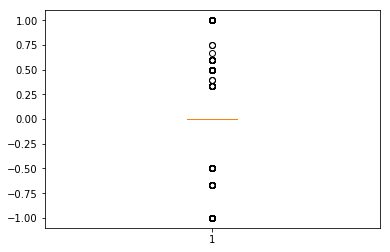

In [21]:
plt.boxplot(df[var].dropna().values)
plt.show()

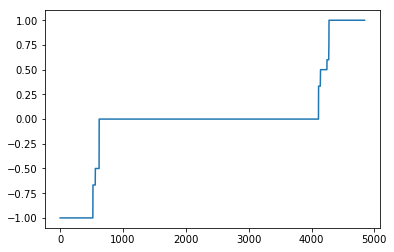

In [22]:
plt.plot(df[var].sort_values().values)
plt.show()

Como en los casos anteriores, por CP

# IDEA_unitprice_sale_residential

Precio medio de venta en € por piso en la zona

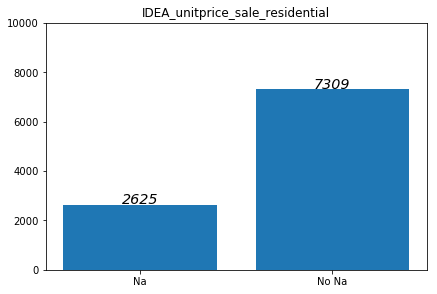

In [84]:
var = 'IDEA_unitprice_sale_residential'
PlotCantNaN(df[var], var)

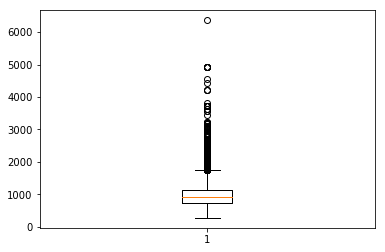

In [24]:
plt.boxplot(df[var].dropna().values)
plt.show()

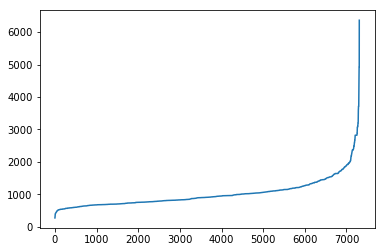

In [25]:
plt.plot(df[var].sort_values().values)
plt.show()

Dado que es el precio medio de venta en € por piso en la zona, imputaremos los valores con la media de los $€/m^2$ de los pisos por código postal

In [29]:
print('Total de precios faltantes:',np.sum(df['HY_precio'].isnull()))
print('Total de datos sin metros totales:',df.HY_metros_totales.isnull().sum(axis=0))

Total de precios faltantes: 0
Total de datos sin metros totales: 0


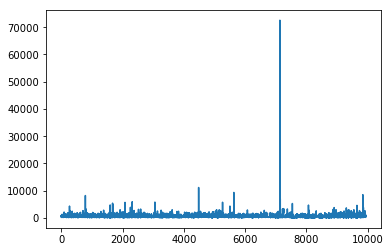

In [49]:
df['PV_precio_metro'] = df.HY_precio/df.HY_metros_totales
plt.plot(df['PV_precio_metro'].values)
plt.show()

In [50]:
df.loc[df['PV_precio_metro']>10000, ['HY_provincia','HY_tipo','HY_descripcion','HY_precio','HY_precio_anterior','HY_metros_utiles','HY_metros_totales','PV_precio_metro']]

,HY_provincia,HY_tipo,HY_descripcion,HY_precio,HY_precio_anterior,HY_metros_utiles,HY_metros_totales,PV_precio_metro
4483,Almería,Local,NaN,4300000.0,4320000.0,385.07,385.07,11166.800841
7135,Almería,Otro,NaN,3773700.0,3773700.0,52.00,52.00,72571.153846


Eliminamos estos casos anómalos.

In [51]:
df = df[df['PV_precio_metro']<=10000]

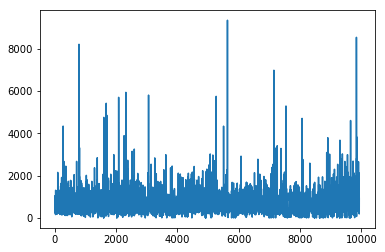

In [52]:
plt.plot(df['PV_precio_metro'].values)
plt.show()

Por lo que ya tenemos una variabilidad más lógica. Cuado imputemos los valores de la variable del precio de la zona, podremos definir una nueva variable que sea la diferencia entre el precio del piso y el precio de la zona. Y luego otra variable que sea barato, caro o estandar segun la diferencia.

# IDEA_stock_sale_residential

Número de inmuebles anunciados para venta en la zona

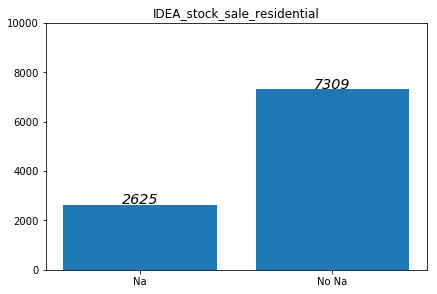

In [68]:
var = 'IDEA_stock_sale_residential'
PlotCantNaN(df[var], var)

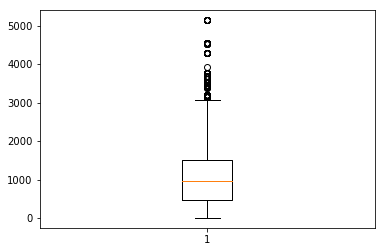

In [69]:
plt.boxplot(df[var].dropna().values)
plt.show()

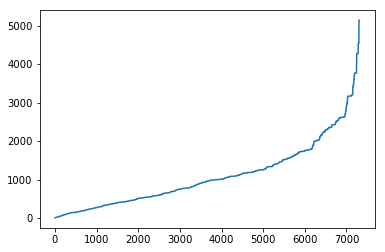

In [70]:
plt.plot(df[var].sort_values().values)
plt.show()

Como con las variables anteriores, imputaremos por CP

# IDEA_demand_sale_residential

Indicador de intensidad de la demanda para venta residencial

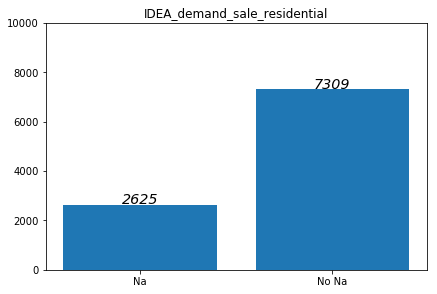

In [71]:
var = 'IDEA_demand_sale_residential'
PlotCantNaN(df[var], var)

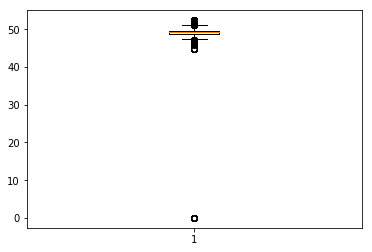

In [72]:
plt.boxplot(df[var].dropna().values)
plt.show()

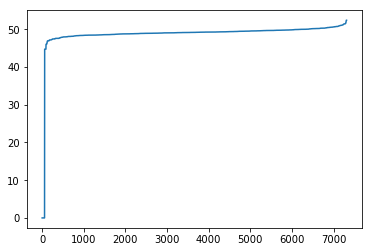

In [73]:
plt.plot(df[var].sort_values().values)
plt.show()

In [74]:
df[df[var] == 0]

,HY_id,HY_cod_postal,HY_provincia,HY_descripcion,HY_distribucion,HY_tipo,HY_antiguedad,HY_metros_utiles,HY_metros_totales,HY_num_banos,...,GA_page_views,GA_mean_bounce,GA_exit_rate,GA_quincena_ini,GA_quincena_ult,TARGET,PV_longitud_descripcion,PV_longitud_distribucion,PV_ind_elasticidad,PV_precio_metro
1,6028500,29915,Otros,NaN,NaN,Casa de pueblo,NaN,151.98,151.98,2,...,684,16.36,5.25,1,47,30.71,0,0,NaN,756.678510
93,6029034,43792,Otros,Casa unifamiliar adosada con parcela situada e...,No es posible el acceso al interior del inmueb...,Casa de pueblo,1900.0,75.00,75.00,0,...,232,10.85,7.42,1,47,31.92,393,128,NaN,313.333333
120,6029158,12310,Castellón,Vivienda unifamiliar que consta de tres planta...,La vivienda está compuesta de tres plantas.,Casa de pueblo,1940.0,226.61,268.00,1,...,187,8.14,5.01,2,47,43.30,1391,43,NaN,217.910448
605,6031330,12160,Castellón,"Ático dúplex de tres dormitorios y dos baños, ...",La vivienda está distribuida en dos plantas. L...,Dúplex,2008.0,69.48,84.85,2,...,68,3.33,12.50,13,47,34.26,1336,295,NaN,953.447260
1328,6034972,12224,Castellón,NaN,NaN,Casa de pueblo,1887.0,99.00,99.00,1,...,521,20.15,17.23,1,47,72.00,0,0,NaN,222.222222
1467,6035478,29340,Otros,"Piso de tres dormitorios y dos baños, situado ...","Se distribuye en tres dormitorios, dos baños c...",Dúplex,2008.0,79.00,96.00,2,...,249,7.42,7.98,1,46,34.80,665,98,NaN,976.041667
1592,6035977,46294,Valencia,Edificio completo de viviendas unifamiliares d...,El complejo se encuentra en construcción con l...,Chalet adosado,2009.0,186.51,186.51,0,...,126,14.66,19.48,1,46,88.05,1256,67,NaN,1249.798938
1661,6036132,46844,Valencia,Casa unifamiliar adosada de dos plantas que co...,La vivienda está compuesta de dos plantas. La ...,Casa de pueblo,1950.0,137.00,137.00,1,...,179,13.04,12.73,1,47,44.80,630,203,NaN,296.350365
1700,6036315,4560,Almería,"Local situado en el municipio de Gador, provin...",NaN,Local,1980.0,173.24,173.24,0,...,27,0.00,2.63,3,45,83.50,390,0,NaN,539.713692
1804,6036671,12160,Castellón,"Ático dúplex de tres dormitorios, un baño y un...",La vivienda está distribuida en dos plantas. L...,Dúplex,2008.0,80.08,92.09,1,...,11,0.00,20.00,1,47,90.20,1332,284,NaN,1007.709849


Situamos los valores a np.nan para posteriormente imputarlos.

In [76]:
df.loc[df[var] == 0, var] = np.nan

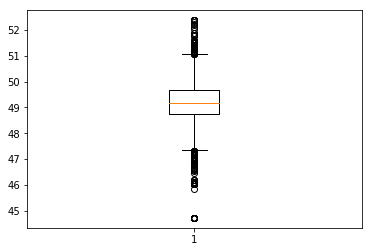

In [77]:
plt.boxplot(df[var].dropna().values)
plt.show()

# IDEA_unitprice_rent_residential
Precio medio de alquiler en €/m² por piso residencial en la zona

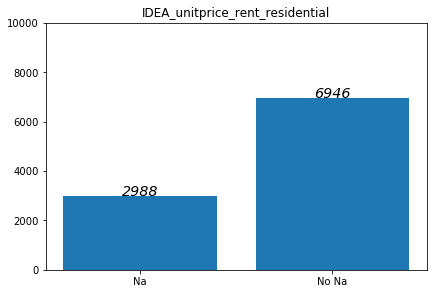

In [78]:
var = 'IDEA_unitprice_rent_residential'
PlotCantNaN(df[var], var)

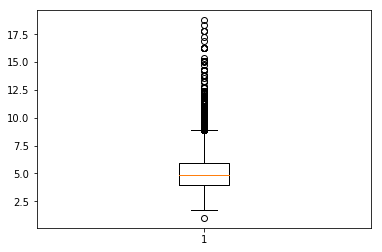

In [79]:
plt.boxplot(df[var].dropna().values)
plt.show()

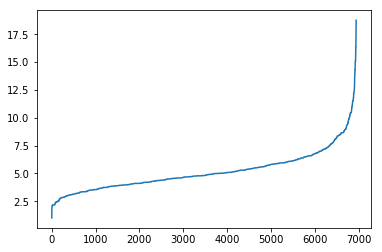

In [80]:
plt.plot(df[var].sort_values().values)
plt.show()

# IDEA_price_rent_residential

Precio medio de alquiler en € por piso en la zona

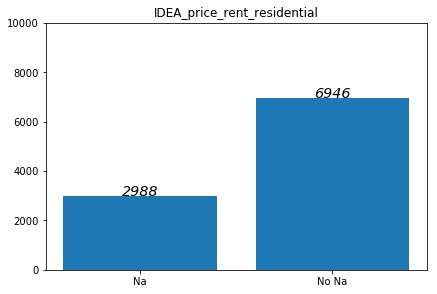

In [81]:
var = 'IDEA_price_rent_residential'
PlotCantNaN(df[var], var)

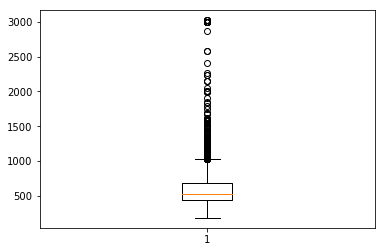

In [82]:
plt.boxplot(df[var].dropna().values)
plt.show()

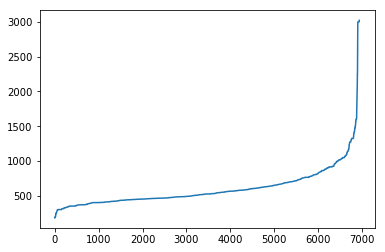

In [83]:
plt.plot(df[var].sort_values().values)
plt.show()

# IDEA_stock_rent_residential
Número de inmuebles anunciados para alquiler en la zona

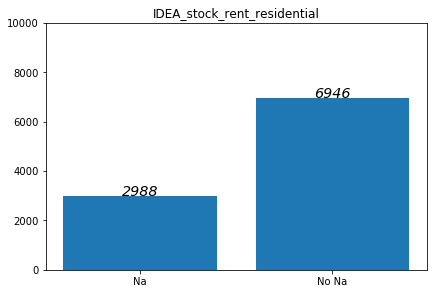

In [89]:
var = 'IDEA_stock_rent_residential'
PlotCantNaN(df[var], var)

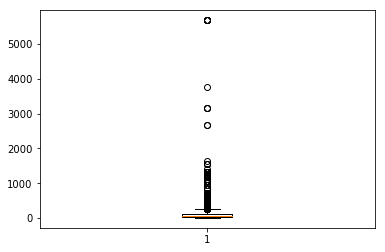

In [86]:
plt.boxplot(df[var].dropna().values)
plt.show()

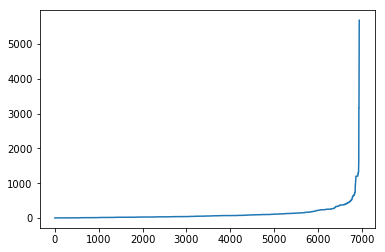

In [87]:
plt.plot(df[var].sort_values().values)
plt.show()

In [91]:
df[var].sort_values(ascending=False).head(25)

8972    5685.0
8032    5685.0
7922    5685.0
7105    5685.0
9895    5685.0
7052    5685.0
3262    3774.0
2881    3162.0
1933    3162.0
209     3162.0
778     2685.0
2554    2685.0
1660    1635.0
9779    1557.0
4899    1542.0
3191    1542.0
5139    1413.0
1646    1311.0
1645    1311.0
3330    1311.0
1644    1311.0
3329    1311.0
3326    1311.0
2066    1311.0
2064    1311.0
Name: IDEA_stock_rent_residential, dtype: float64

# IDEA_demand_rent_residential
Indicador de intensidad de la demanda para alquiler residencial

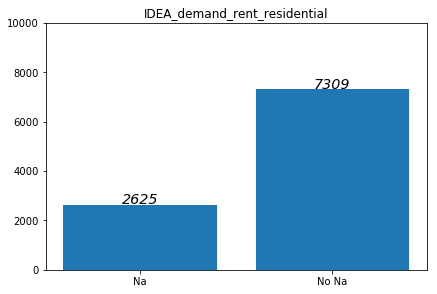

In [93]:
var = 'IDEA_demand_rent_residential'
PlotCantNaN(df[var], var)

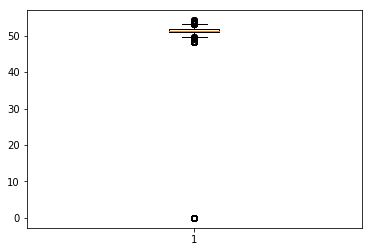

In [94]:
plt.boxplot(df[var].dropna().values)
plt.show()

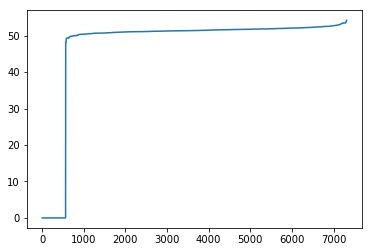

In [95]:
plt.plot(df[var].sort_values().values)
plt.show()

In [99]:
np.sum(df[var]==0)

563

In [100]:
df.loc[df[var]>0,var].sort_values()

9767    48.21
2721    48.21
3936    48.21
3939    48.21
1549    48.21
9415    48.21
9766    48.21
2455    48.21
2415    48.21
2452    48.21
7377    48.41
259     48.41
3533    48.51
3534    48.51
7393    48.59
3265    49.00
7153    49.10
6238    49.31
2017    49.31
7077    49.31
5515    49.31
497     49.31
6243    49.31
548     49.31
8134    49.31
2014    49.31
6865    49.31
3382    49.31
552     49.31
2026    49.31
        ...  
9583    53.47
9587    53.47
3006    53.47
9586    53.47
9584    53.47
9582    53.47
5196    53.53
4110    53.53
4415    53.53
7457    53.53
8260    53.55
9845    53.59
5142    53.66
21      53.68
4134    53.69
25      53.80
1963    53.80
2295    53.86
4931    53.86
2590    53.86
7519    53.95
4888    53.95
4863    53.95
3664    53.95
1039    53.95
9872    53.95
9776    53.95
9304    54.22
1564    54.22
2552    54.22
Name: IDEA_demand_rent_residential, Length: 6746, dtype: float64

Posibles clases: Sin_demanda, demanda_baja, media, o alta

# GA_page_views

Las variables GA\_\* no tienen valores faltantes.

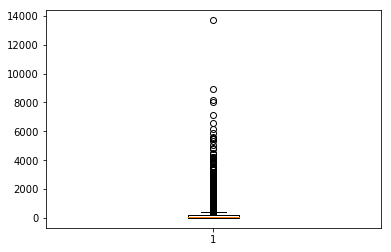

In [101]:
var = 'GA_page_views'
plt.boxplot(df[var].dropna().values)
plt.show()

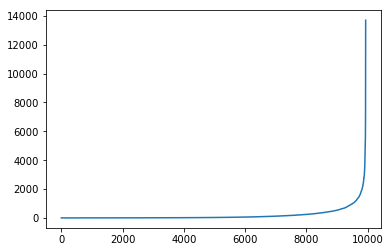

In [102]:
plt.plot(df[var].sort_values().values)
plt.show()

In [104]:
df[var].sort_values(ascending = False)

2081    13698
144      8941
4620     8166
4564     8021
2887     7105
2125     6580
2118     6129
1950     5900
1989     5639
7112     5561
2089     5503
9606     5480
922      5328
8261     5032
2088     4830
1955     4759
506      4488
2186     4426
2111     4239
4482     4206
4496     4205
2079     4152
3802     4137
698      4070
3379     4021
237      3932
268      3911
696      3890
200      3882
905      3746
        ...  
6641        1
3298        1
6643        1
6644        1
6645        1
6757        1
6647        1
9935        1
6649        1
6729        1
6754        1
6752        1
6751        1
6750        1
6749        1
6654        1
6741        1
6690        1
1606        1
1607        1
6658        1
6657        1
1906        0
1059        0
4502        0
7805        0
7804        0
7803        0
289         0
7800        0
Name: GA_page_views, Length: 9934, dtype: int64

# GA_mean_bounce

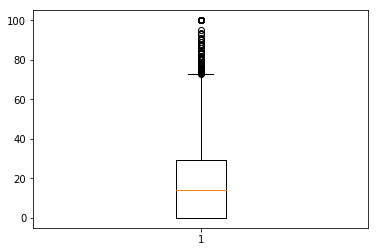

In [105]:
var = 'GA_mean_bounce'
plt.boxplot(df[var].dropna().values)
plt.show()

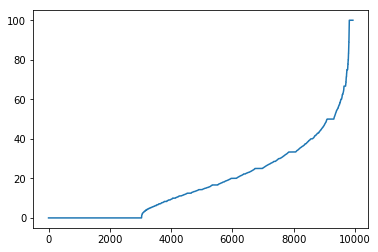

In [106]:
plt.plot(df[var].sort_values().values)
plt.show()

# GA_exit_rate

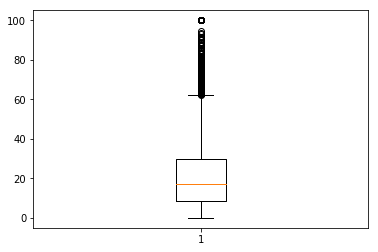

In [107]:
var = 'GA_exit_rate'
plt.boxplot(df[var].dropna().values)
plt.show()

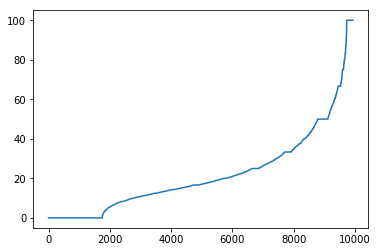

In [108]:
plt.plot(df[var].sort_values().values)
plt.show()

# GA_quincena_ini

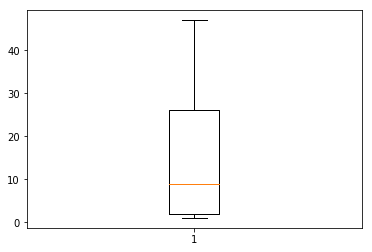

In [109]:
var = 'GA_quincena_ini'
plt.boxplot(df[var].dropna().values)
plt.show()

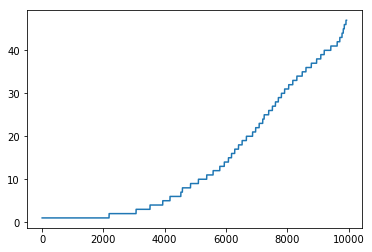

In [110]:
plt.plot(df[var].sort_values().values)
plt.show()

# GA_quincena_ult

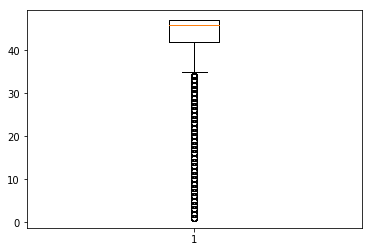

In [11]:
var = 'GA_quincena_ult'
plt.boxplot(df[var].dropna().values)
plt.show()

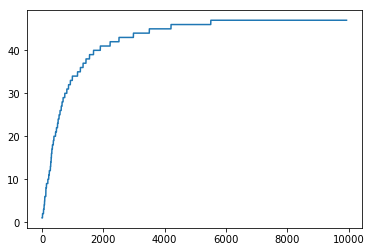

In [112]:
plt.plot(df[var].sort_values().values)
plt.show()

# Guardamos el df

In [113]:
df.to_csv('df_todas_limpias.csv', sep = '|', encoding='utf-8', index = False)